<a href="https://colab.research.google.com/github/Harshalt05/Feynn-Lab1/blob/main/EV_BIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


In [ ]:


from google.colab import files
uploaded=files.upload()

Saving ev_model_spec.csv to ev_model_spec.csv


In [ ]:
df = pd.read_csv('ev_model_spec.csv')

In [ ]:
df.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


In [ ]:

df.isnull().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [ ]:

df.describe()


,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
mean,94763.8974,100.6667,49.7179,98.8462,5.4103,1364.1026
std,30861.6630,34.8344,23.5573,29.0304,1.6657,1302.7778
min,51094.0000,45.0000,25.0000,59.0000,3.0000,250.0000
25%,69553.5000,79.5000,25.0000,78.0000,4.0000,250.0000
50%,90282.0000,90.0000,48.0000,93.0000,5.0000,1000.0000
75%,109809.0000,120.5000,64.0000,112.5000,6.0000,1950.0000
max,171250.0000,180.0000,116.0000,150.0000,10.0000,5500.0000


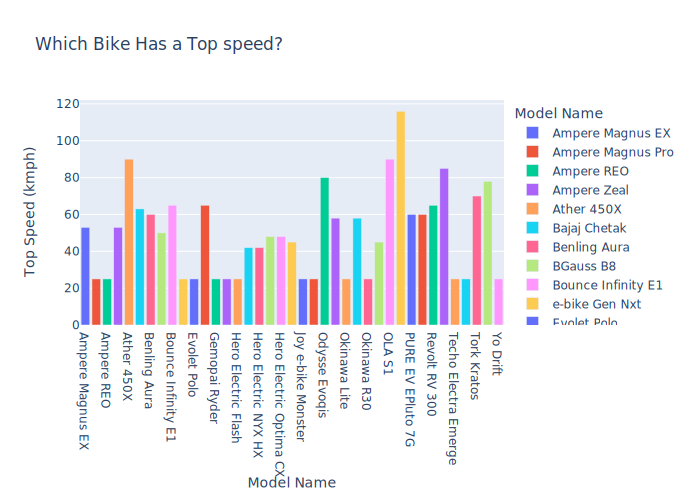

In [ ]:
fig = px.bar(df,x='Model Name',y = 'Top Speed (kmph)',color = 'Model Name',title = 'Which Bike Has a Top speed?',labels = {'x':'Bike Brands','y':'Top Speed Km/H'})
pio.show(fig)

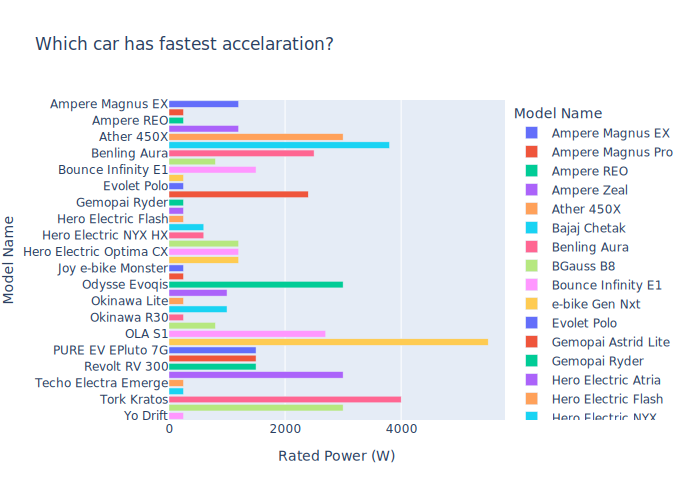

In [ ]:
fig = px.bar(df,x='Rated Power (W)',y = 'Model Name',color = 'Model Name',title = 'Which car has fastest accelaration?',labels = {'x':'Rated Power','y':'Bike Brands'})
pio.show(fig)

<Axes: title={'center': 'Bike Price'}, xlabel='No. of Samples', ylabel='Bike Price'>

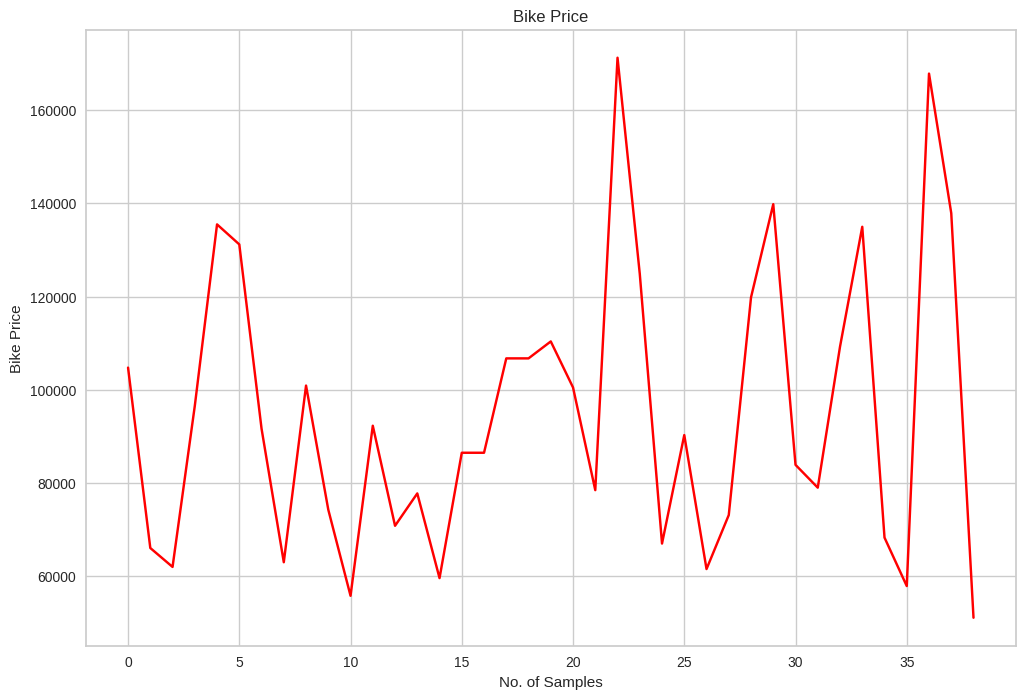

In [ ]:
df['Price'].plot(figsize = (12,8),title='Bike Price',xlabel = 'No. of Samples',ylabel = 'Bike Price',color = 'red')

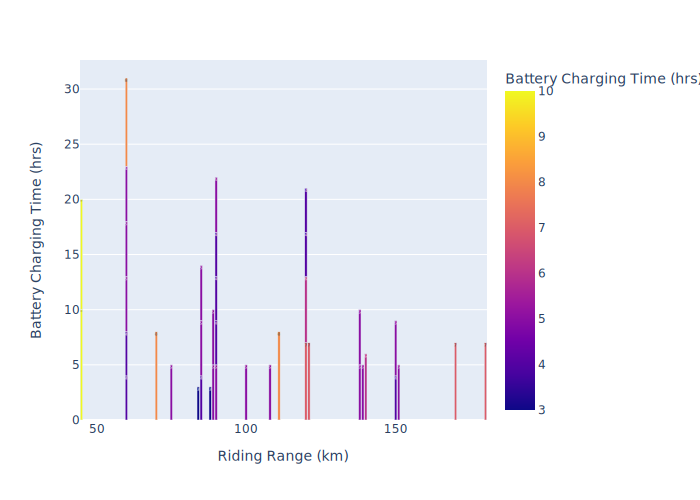

In [ ]:

fig = px.bar(df,x = 'Riding Range (km)',y = 'Battery Charging Time (hrs)',color = 'Battery Charging Time (hrs)',text='Battery Charging Time (hrs)')
pio.show(fig)

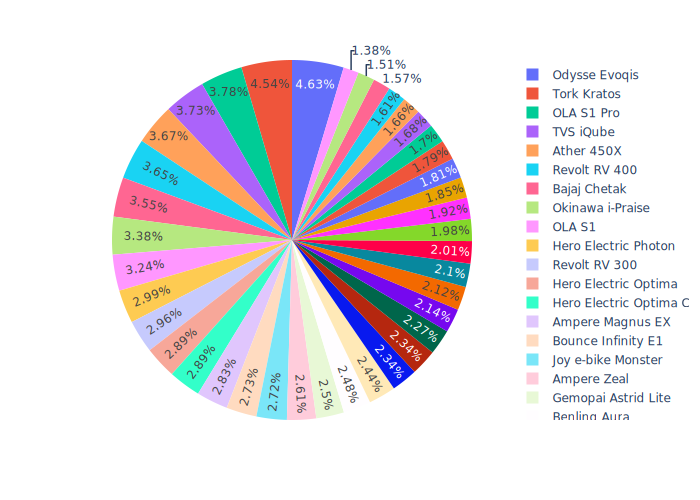

In [ ]:

fig = px.pie(df,names = 'Model Name',values = 'Price')
pio.show(fig)

In [ ]:
fig = px.scatter_3d(df,x = 'Model Name',y = 'Weight (kg)',z = 'Top Speed (kmph)',color='Model Name')

In [ ]:
fig = px.scatter_3d(df,x = 'Model Name',y = 'Rated Power (W)',z = 'Price',color = 'Model Name')

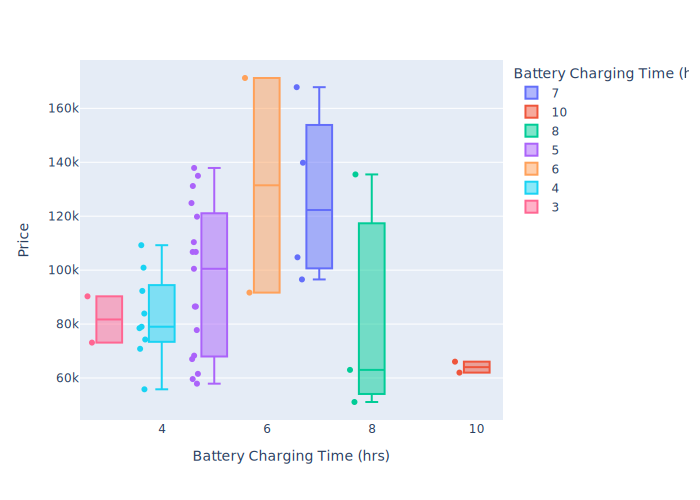

In [ ]:

fig = px.box(df,x='Battery Charging Time (hrs)',y = 'Price',color = 'Battery Charging Time (hrs)',points='all')
pio.show(fig)

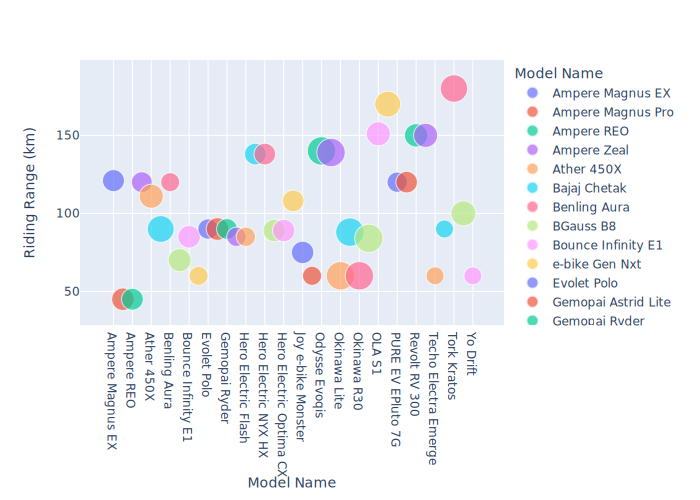

In [ ]:

fig = px.scatter(df,x = 'Model Name',y = 'Riding Range (km)',size='Weight (kg)',color = 'Model Name',hover_data=['Battery Charging Time (hrs)','Price'])
pio.show(fig)

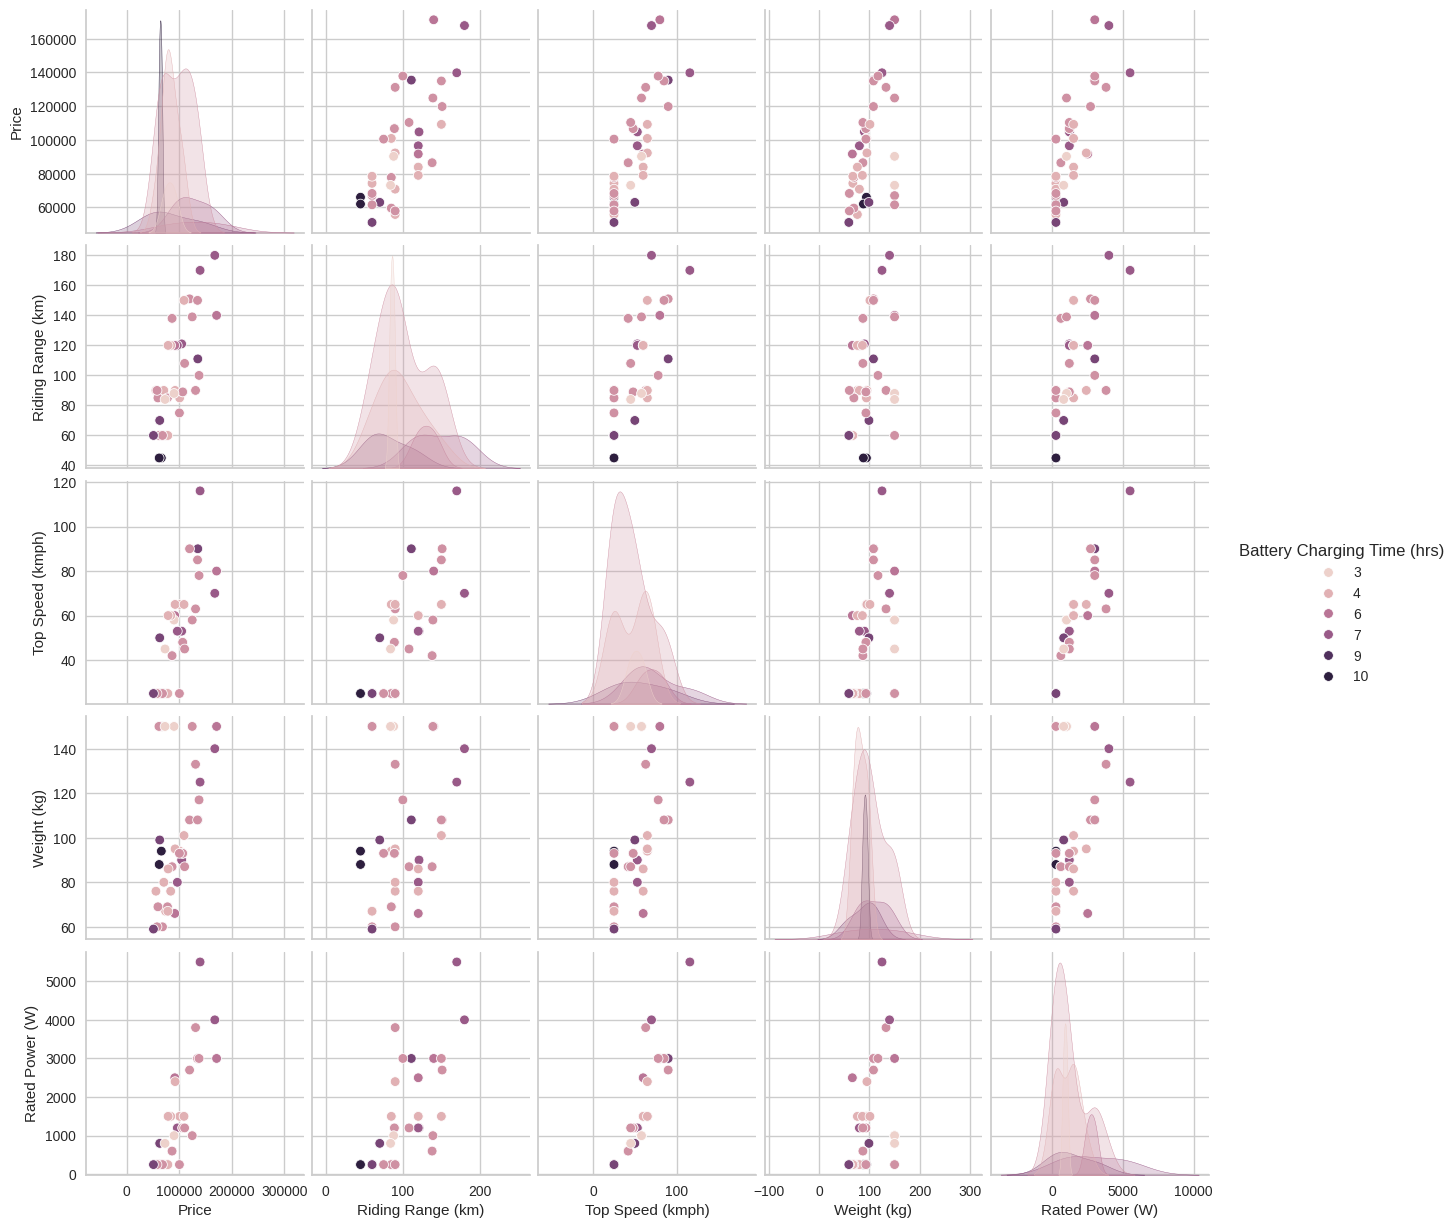

In [ ]:
sb.pairplot(df,hue='Battery Charging Time (hrs)')

<ipython-input-27-ac0745e1c6f5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

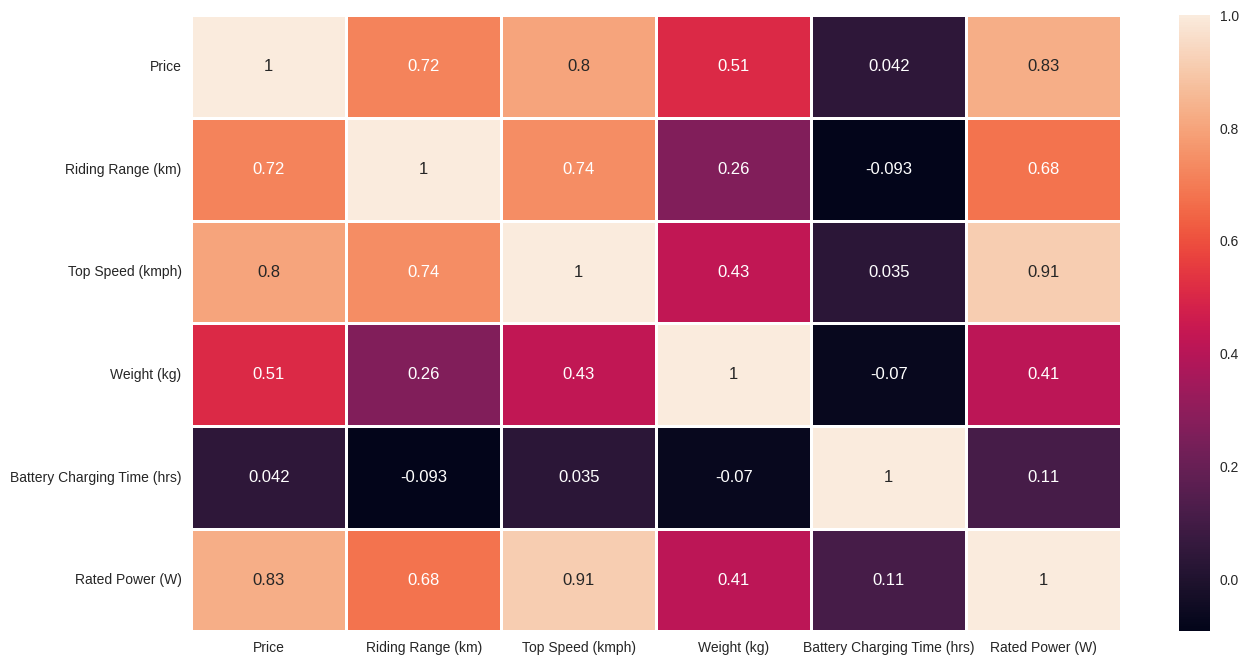

In [ ]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [ ]:
a=np.arange(0,39)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Ampere Magnus EX'),
  Text(1, 0, 'Ampere Magnus Pro'),
  Text(2, 0, 'Ampere REO'),
  Text(3, 0, 'Ampere Zeal'),
  Text(4, 0, 'Ather 450X'),
  Text(5, 0, 'Bajaj Chetak'),
  Text(6, 0, 'Benling Aura'),
  Text(7, 0, 'BGauss B8'),
  Text(8, 0, 'Bounce Infinity E1'),
  Text(9, 0, 'e-bike Gen Nxt'),
  Text(10, 0, 'Evolet Polo'),
  Text(11, 0, 'Gemopai Astrid Lite'),
  Text(12, 0, 'Gemopai Ryder'),
  Text(13, 0, 'Hero Electric Atria'),
  Text(14, 0, 'Hero Electric Flash'),
  Text(15, 0, 'Hero Electric NYX'),
  Text(16, 0, 'Hero Electric NYX HX'),
  Text(17, 0, 'Hero Electric Optima'),
  Text(18, 0, 'Hero Electric Optima CX'),
  Text(19, 0, 'Hero Electric Photon'),
  Text(20, 0, 'Joy e-bike Monster'),
  Text(21, 0, 'Joy e-bike Wolf'),
  Text(22, 0, 'Odysse Ev

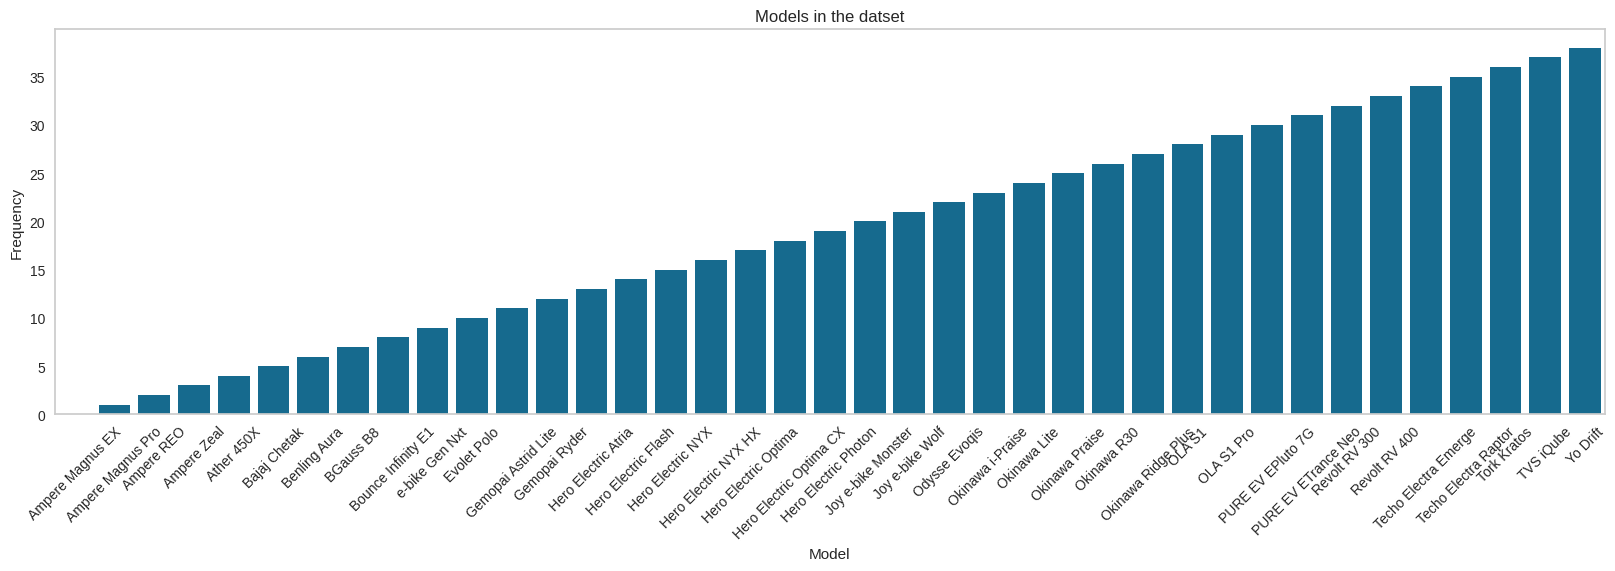

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Model Name',y=a,data=df)
plt.grid(axis='y')
plt.title('Models in the datset')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

<ipython-input-30-eaf2a79c6b06>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Ampere Magnus EX'),
  Text(1, 0, 'Ampere Magnus Pro'),
  Text(2, 0, 'Ampere REO'),
  Text(3, 0, 'Ampere Zeal'),
  Text(4, 0, 'Ather 450X'),
  Text(5, 0, 'Bajaj Chetak'),
  Text(6, 0, 'Benling Aura'),
  Text(7, 0, 'BGauss B8'),
  Text(8, 0, 'Bounce Infinity E1'),
  Text(9, 0, 'e-bike Gen Nxt'),
  Text(10, 0, 'Evolet Polo'),
  Text(11, 0, 'Gemopai Astrid Lite'),
  Text(12, 0, 'Gemopai Ryder'),
  Text(13, 0, 'Hero Electric Atria'),
  Text(14, 0, 'Hero Electric Flash'),
  Text(15, 0, 'Hero Electric NYX'),
  Text(16, 0, 'Hero Electric NYX HX'),
  Text(17, 0, 'Hero Electric Optima'),
  Text(18, 0, 'Hero Electric Optima CX'),
  Text(19, 0, 'Hero Electric Photon'),
  Text(20, 0, 'Joy e-bike Monster'),
  Text(21, 0, 'Joy e-bike Wolf'),
  Text(22, 0, 'Odysse Ev

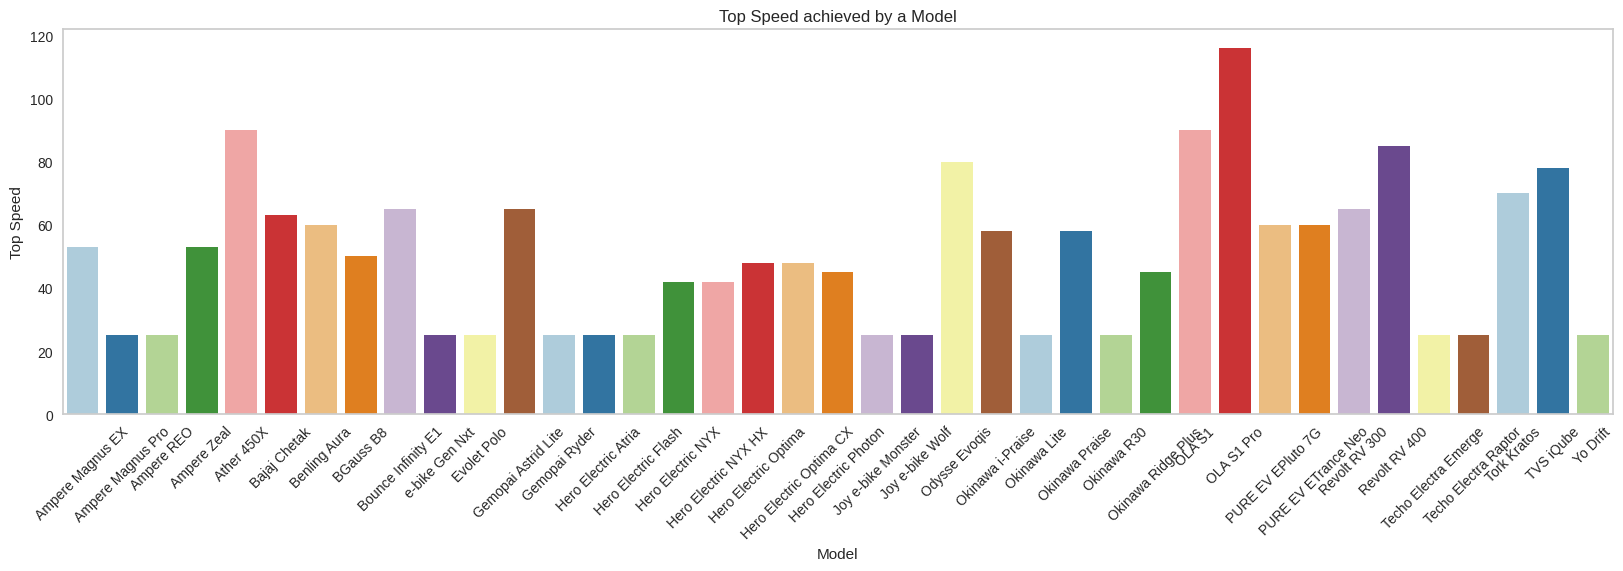

In [ ]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Model Name',y='Top Speed (kmph)',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a Model')
plt.xlabel('Model')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

<ipython-input-31-d092a7463e4e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Ampere Magnus EX'),
  Text(1, 0, 'Ampere Magnus Pro'),
  Text(2, 0, 'Ampere REO'),
  Text(3, 0, 'Ampere Zeal'),
  Text(4, 0, 'Ather 450X'),
  Text(5, 0, 'Bajaj Chetak'),
  Text(6, 0, 'Benling Aura'),
  Text(7, 0, 'BGauss B8'),
  Text(8, 0, 'Bounce Infinity E1'),
  Text(9, 0, 'e-bike Gen Nxt'),
  Text(10, 0, 'Evolet Polo'),
  Text(11, 0, 'Gemopai Astrid Lite'),
  Text(12, 0, 'Gemopai Ryder'),
  Text(13, 0, 'Hero Electric Atria'),
  Text(14, 0, 'Hero Electric Flash'),
  Text(15, 0, 'Hero Electric NYX'),
  Text(16, 0, 'Hero Electric NYX HX'),
  Text(17, 0, 'Hero Electric Optima'),
  Text(18, 0, 'Hero Electric Optima CX'),
  Text(19, 0, 'Hero Electric Photon'),
  Text(20, 0, 'Joy e-bike Monster'),
  Text(21, 0, 'Joy e-bike Wolf'),
  Text(22, 0, 'Odysse Ev

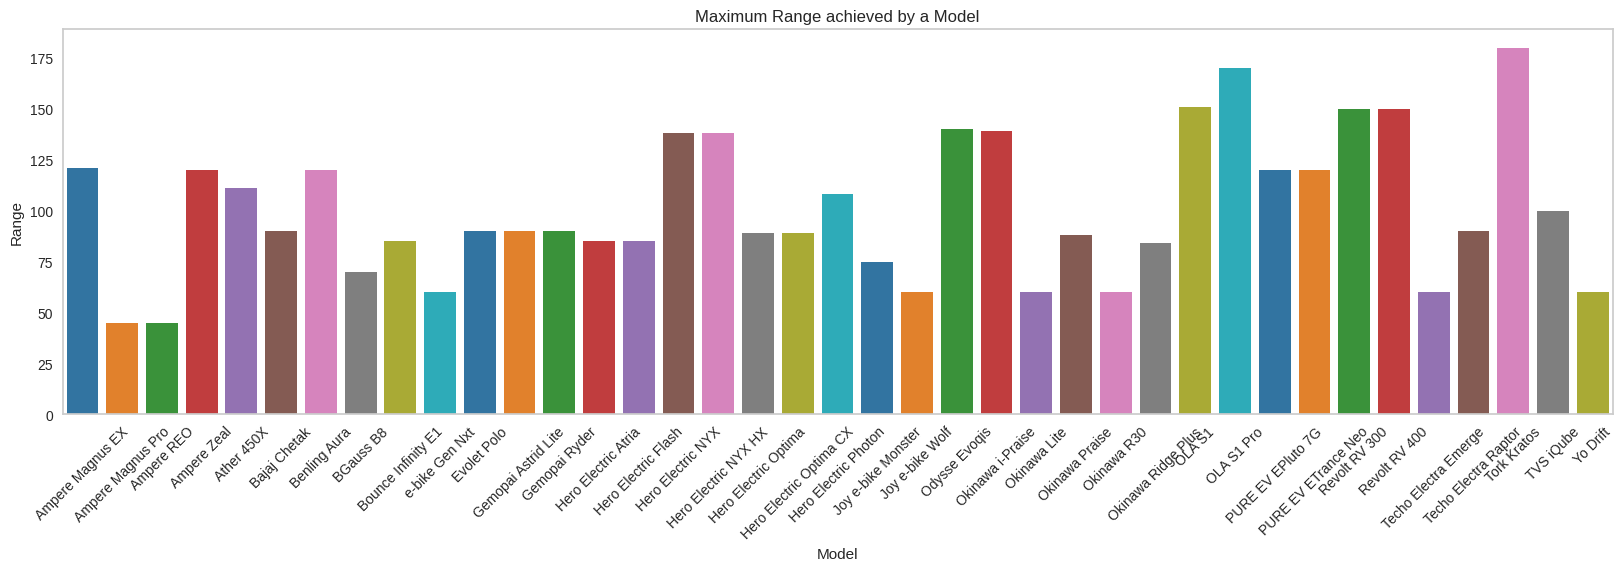

In [ ]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='Model Name',y='Riding Range (km)',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a Model')
plt.xlabel('Model')
plt.ylabel('Range')
plt.xticks(rotation=45)

<ipython-input-32-9d20dda66edd>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Ampere Magnus EX'),
  Text(1, 0, 'Ampere Magnus Pro'),
  Text(2, 0, 'Ampere REO'),
  Text(3, 0, 'Ampere Zeal'),
  Text(4, 0, 'Ather 450X'),
  Text(5, 0, 'Bajaj Chetak'),
  Text(6, 0, 'Benling Aura'),
  Text(7, 0, 'BGauss B8'),
  Text(8, 0, 'Bounce Infinity E1'),
  Text(9, 0, 'e-bike Gen Nxt'),
  Text(10, 0, 'Evolet Polo'),
  Text(11, 0, 'Gemopai Astrid Lite'),
  Text(12, 0, 'Gemopai Ryder'),
  Text(13, 0, 'Hero Electric Atria'),
  Text(14, 0, 'Hero Electric Flash'),
  Text(15, 0, 'Hero Electric NYX'),
  Text(16, 0, 'Hero Electric NYX HX'),
  Text(17, 0, 'Hero Electric Optima'),
  Text(18, 0, 'Hero Electric Optima CX'),
  Text(19, 0, 'Hero Electric Photon'),
  Text(20, 0, 'Joy e-bike Monster'),
  Text(21, 0, 'Joy e-bike Wolf'),
  Text(22, 0, 'Odysse Ev

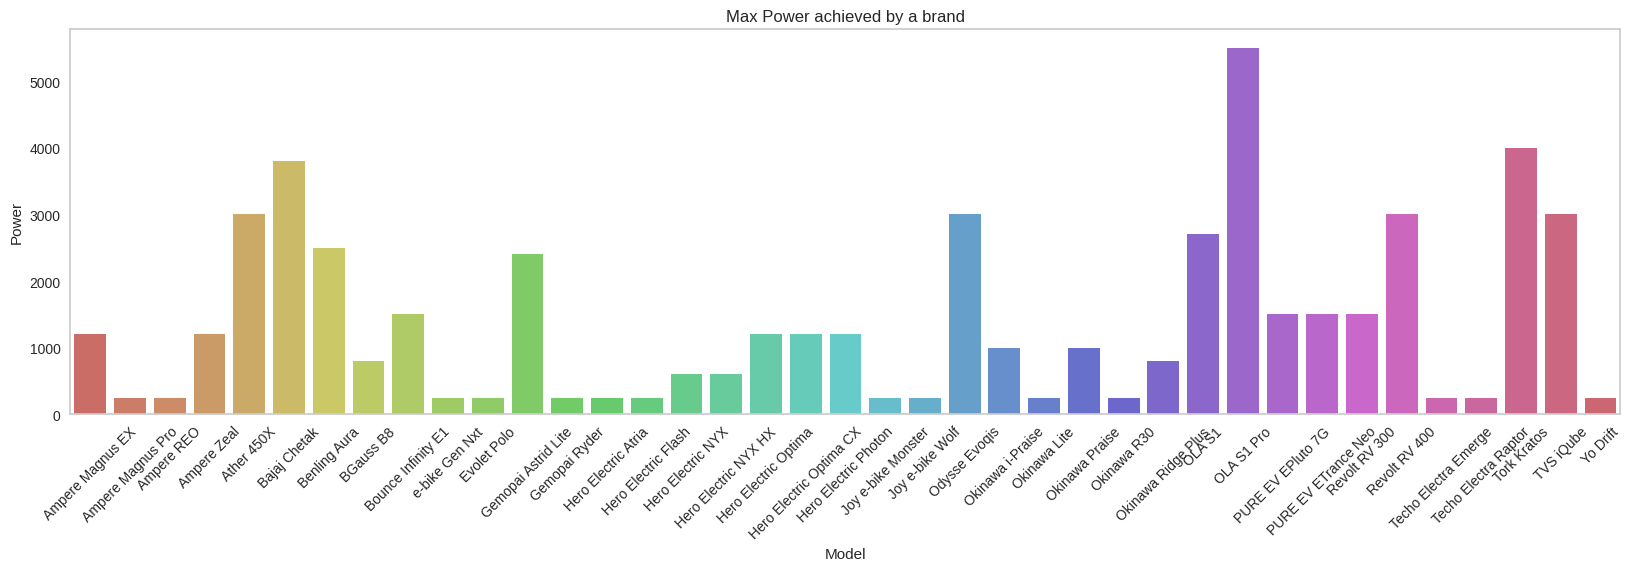

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Model Name',y='Rated Power (W)',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Max Power achieved by a brand')
plt.xlabel('Model')
plt.ylabel('Power')
plt.xticks(rotation=45)

<ipython-input-33-e27016ea399d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Ampere Magnus EX'),
  Text(1, 0, 'Ampere Magnus Pro'),
  Text(2, 0, 'Ampere REO'),
  Text(3, 0, 'Ampere Zeal'),
  Text(4, 0, 'Ather 450X'),
  Text(5, 0, 'Bajaj Chetak'),
  Text(6, 0, 'Benling Aura'),
  Text(7, 0, 'BGauss B8'),
  Text(8, 0, 'Bounce Infinity E1'),
  Text(9, 0, 'e-bike Gen Nxt'),
  Text(10, 0, 'Evolet Polo'),
  Text(11, 0, 'Gemopai Astrid Lite'),
  Text(12, 0, 'Gemopai Ryder'),
  Text(13, 0, 'Hero Electric Atria'),
  Text(14, 0, 'Hero Electric Flash'),
  Text(15, 0, 'Hero Electric NYX'),
  Text(16, 0, 'Hero Electric NYX HX'),
  Text(17, 0, 'Hero Electric Optima'),
  Text(18, 0, 'Hero Electric Optima CX'),
  Text(19, 0, 'Hero Electric Photon'),
  Text(20, 0, 'Joy e-bike Monster'),
  Text(21, 0, 'Joy e-bike Wolf'),
  Text(22, 0, 'Odysse Ev

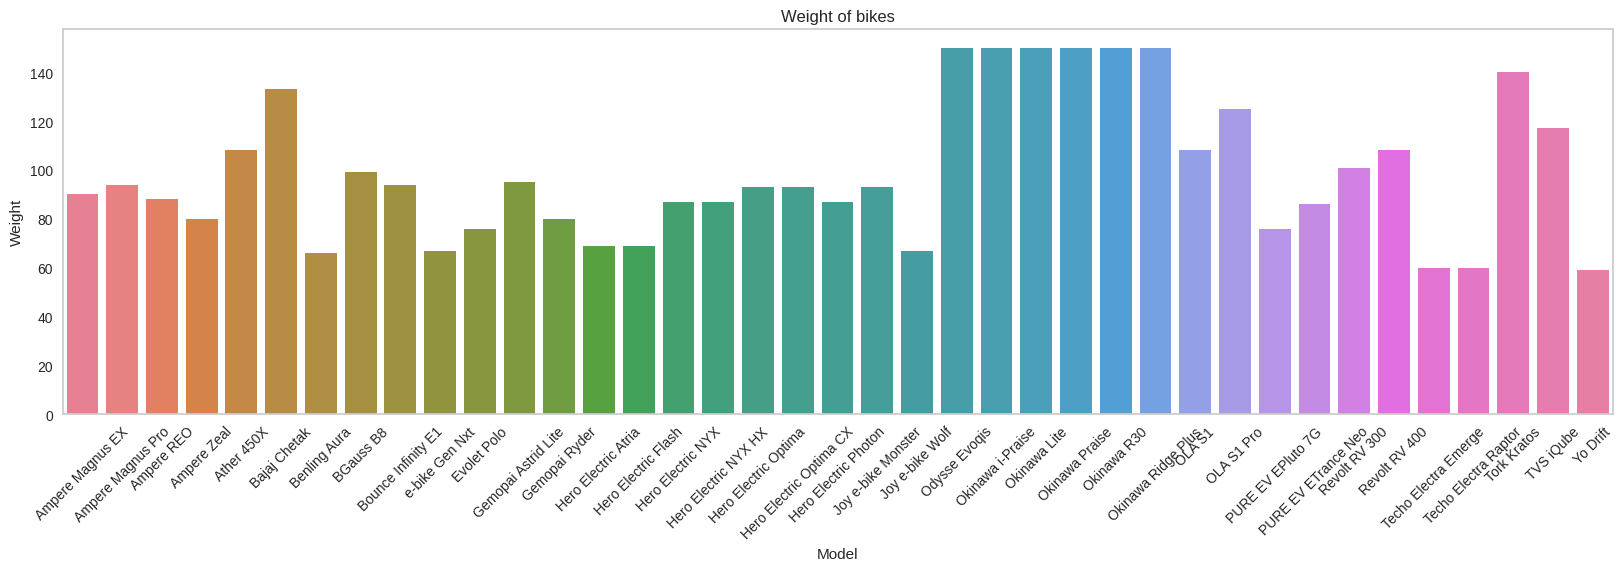

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Model Name',y='Weight (kg)',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Weight of bikes')
plt.xlabel('Model')
plt.ylabel('Weight')
plt.xticks(rotation=45)

In [ ]:
df3= df[["Top Speed (kmph)", "Price"]].groupby("Top Speed (kmph)").count()
df4= df[["Riding Range (km)", "Price"]].groupby("Riding Range (km)").count()
df5= df[["Riding Range (km)", "Top Speed (kmph)"]].groupby("Riding Range (km)").count()
df5.head()

,Top Speed (kmph)
Riding Range (km),
45,2
60,6
70,1
75,1
84,1


In [ ]:
df3=df3.sort_values("Top Speed (kmph)",ascending = False).head(10)
df4=df4.sort_values("Riding Range (km)",ascending = False).head(10)
df5=df5.sort_values("Riding Range (km)",ascending = False).head(10)

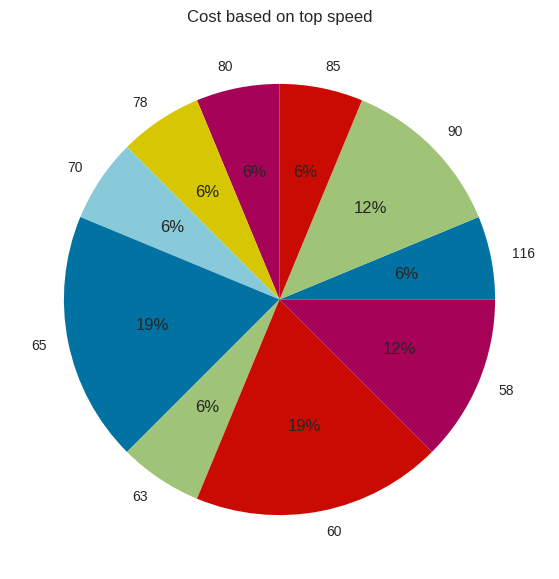

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["Price"],labels=df3.index,autopct='%1.0f%%')
plt.show()

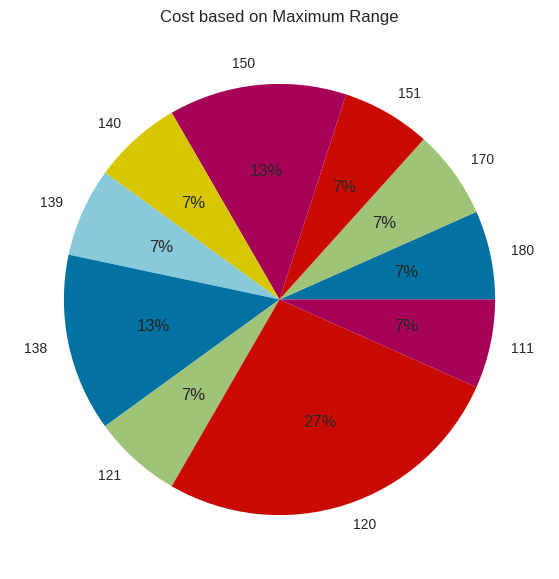

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["Price"],labels=df4.index,autopct='%1.0f%%')
plt.show()

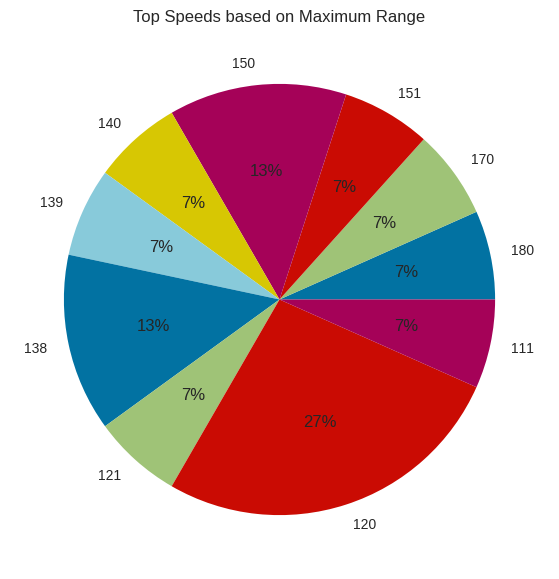

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["Top Speed (kmph)"],labels=df5.index,autopct='%1.0f%%')
plt.show()

In [ ]:
x=df[['Weight (kg)','Riding Range (km)','Top Speed (kmph)', 'Battery Charging Time (hrs)','Rated Power (W)']]
y=df['Price']

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     21.46
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           1.64e-09
Time:                        10:59:46   Log-Likelihood:                -429.76
No. Observations:                  39   AIC:                             871.5
Df Residuals:                      33   BIC:                             881.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         2.64e+04   1.72e+04      1.531      0.135   -8687.702    6.15e+04
Weight (kg)                   218.5477    100.714      2.170      0.037      13.643     423.453
Riding Range (km)             261.7969    114.530      2.286      0.029      28.784     494.809
Top Speed (kmph)               16.3132    297.963      0.055      0.957    -589.898     622.524
Battery Charging Time (hrs)   462.9754   1634.969      0.283      0.779   -2863.394    3789.345
Rated Power (W)                12.5309      4.948      2.533      0.016       2.465      22.597
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.705
Skew:                           0.159   Prob(JB):                        0.703
Kurtosis:                       2.424   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)


In [ ]:
r2=(r2_score(y_test,pred))
print(r2*100)

35.57981770271152


In [ ]:
y1=df[['Battery Charging Time (hrs)']]
x1=df[['Price']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[0, 1, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

<Axes: xlabel='Top Speed (kmph)', ylabel='Riding Range (km)'>

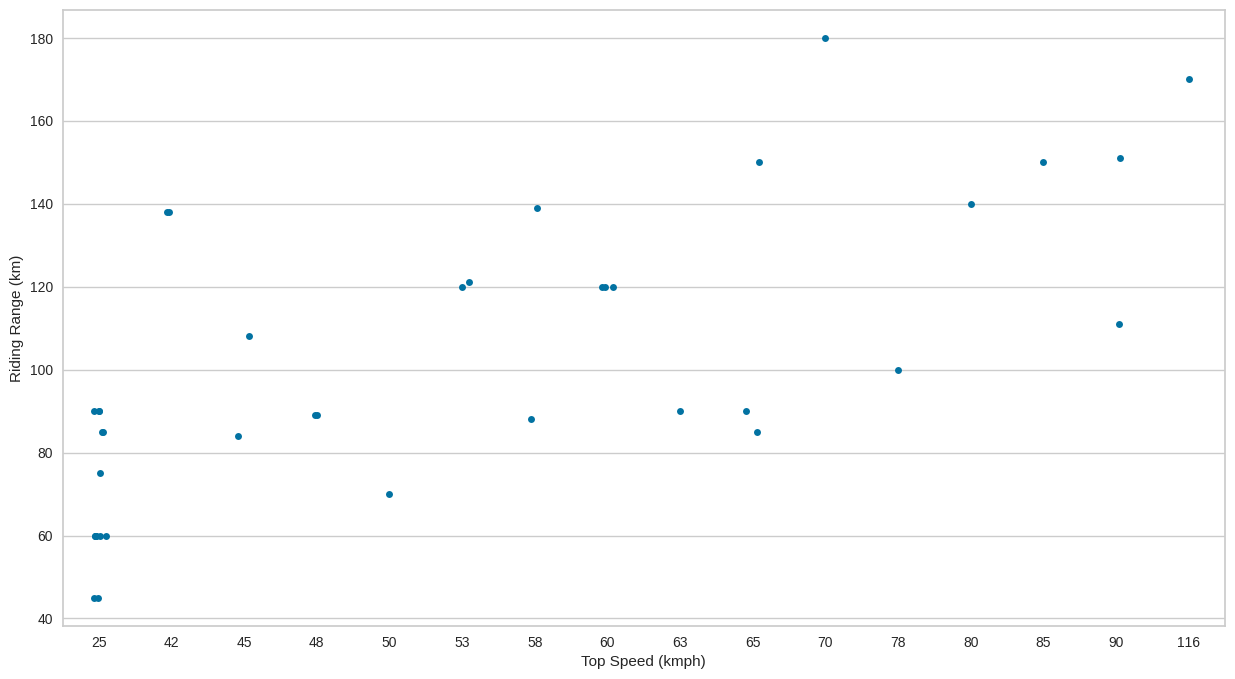

In [ ]:

ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='Top Speed (kmph)', y='Riding Range (km)', data=df, jitter=True)

<Axes: xlabel='Top Speed (kmph)', ylabel='Battery Charging Time (hrs)'>

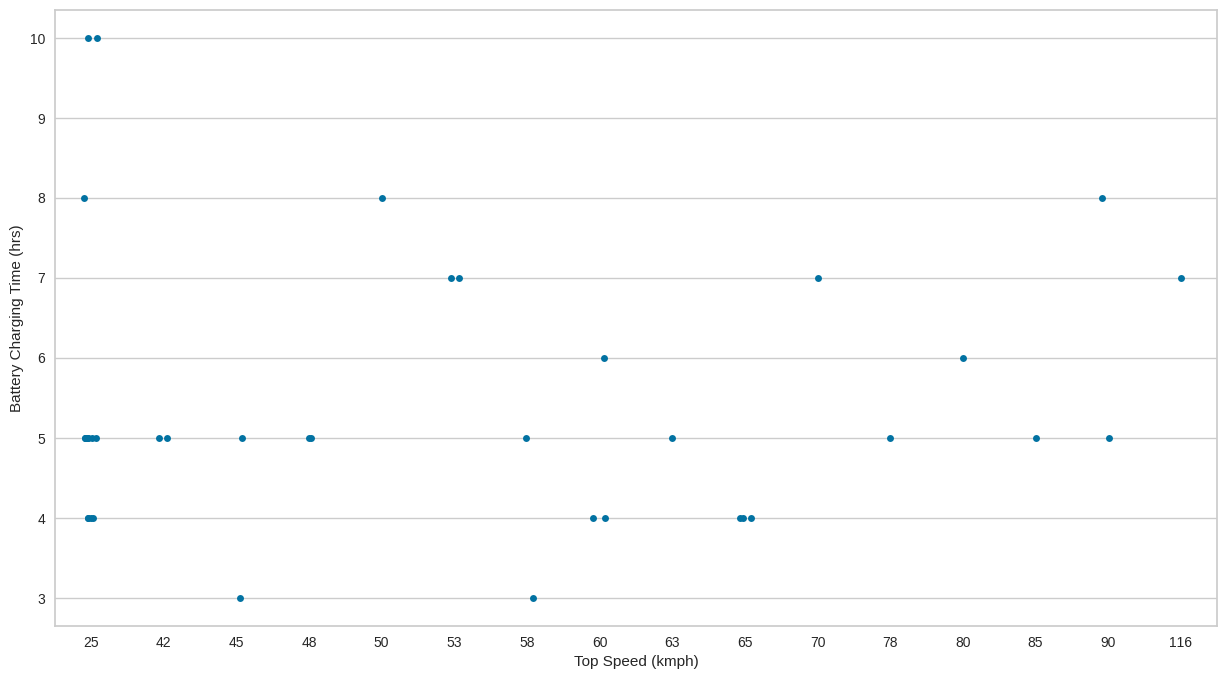

In [ ]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='Top Speed (kmph)', y='Battery Charging Time (hrs)', data=df, jitter=True)

In [ ]:
features = ['Riding Range (km)','Top Speed (kmph)','Battery Charging Time (hrs)','Rated Power (W)', 'Weight (kg)','Price']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=6)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6
0,0.3432,0.9287,-0.3478,0.6096,-0.1092,-0.1975
1,-2.1298,2.7043,1.1610,0.0980,0.0197,-0.0544
2,-2.2571,2.7462,0.9721,0.0503,0.0937,-0.0402
3,0.0953,1.0004,-0.6521,0.5070,0.0481,-0.1690
4,2.3771,1.6912,0.1434,-0.5277,-0.0534,-0.5165
5,2.0114,-0.1567,0.9425,-1.1203,-0.4328,0.7228
6,0.5091,0.6656,-1.3137,-0.3256,0.2940,0.3527
7,-1.0834,1.5241,0.6410,-0.1459,0.7357,-0.2934
8,0.2174,-0.6893,-0.1937,-0.8219,-0.0550,-0.4660
9,-2.1333,-0.6368,-0.4607,-0.5472,-0.4840,0.0090


In [ ]:

df_6=data2.iloc[:,:6]
df_6.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6
0,0.3432,0.9287,-0.3478,0.6096,-0.1092,-0.1975
1,-2.1298,2.7043,1.1610,0.0980,0.0197,-0.0544
2,-2.2571,2.7462,0.9721,0.0503,0.0937,-0.0402


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_6.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
PC1,0.4338,-0.1074,-0.4076,0.7486,0.2175,0.1624
PC2,0.4955,0.0456,-0.1239,-0.3274,0.4281,-0.6683
PC3,0.0119,0.9601,0.1694,0.2138,0.0530,-0.0279
PC4,0.4901,0.1326,-0.0837,-0.4914,0.1035,0.6950
Pc5,0.2980,-0.2153,0.8843,0.2109,0.1870,0.0587
PC6,0.4870,0.0241,0.0282,0.0265,-0.8491,-0.1995


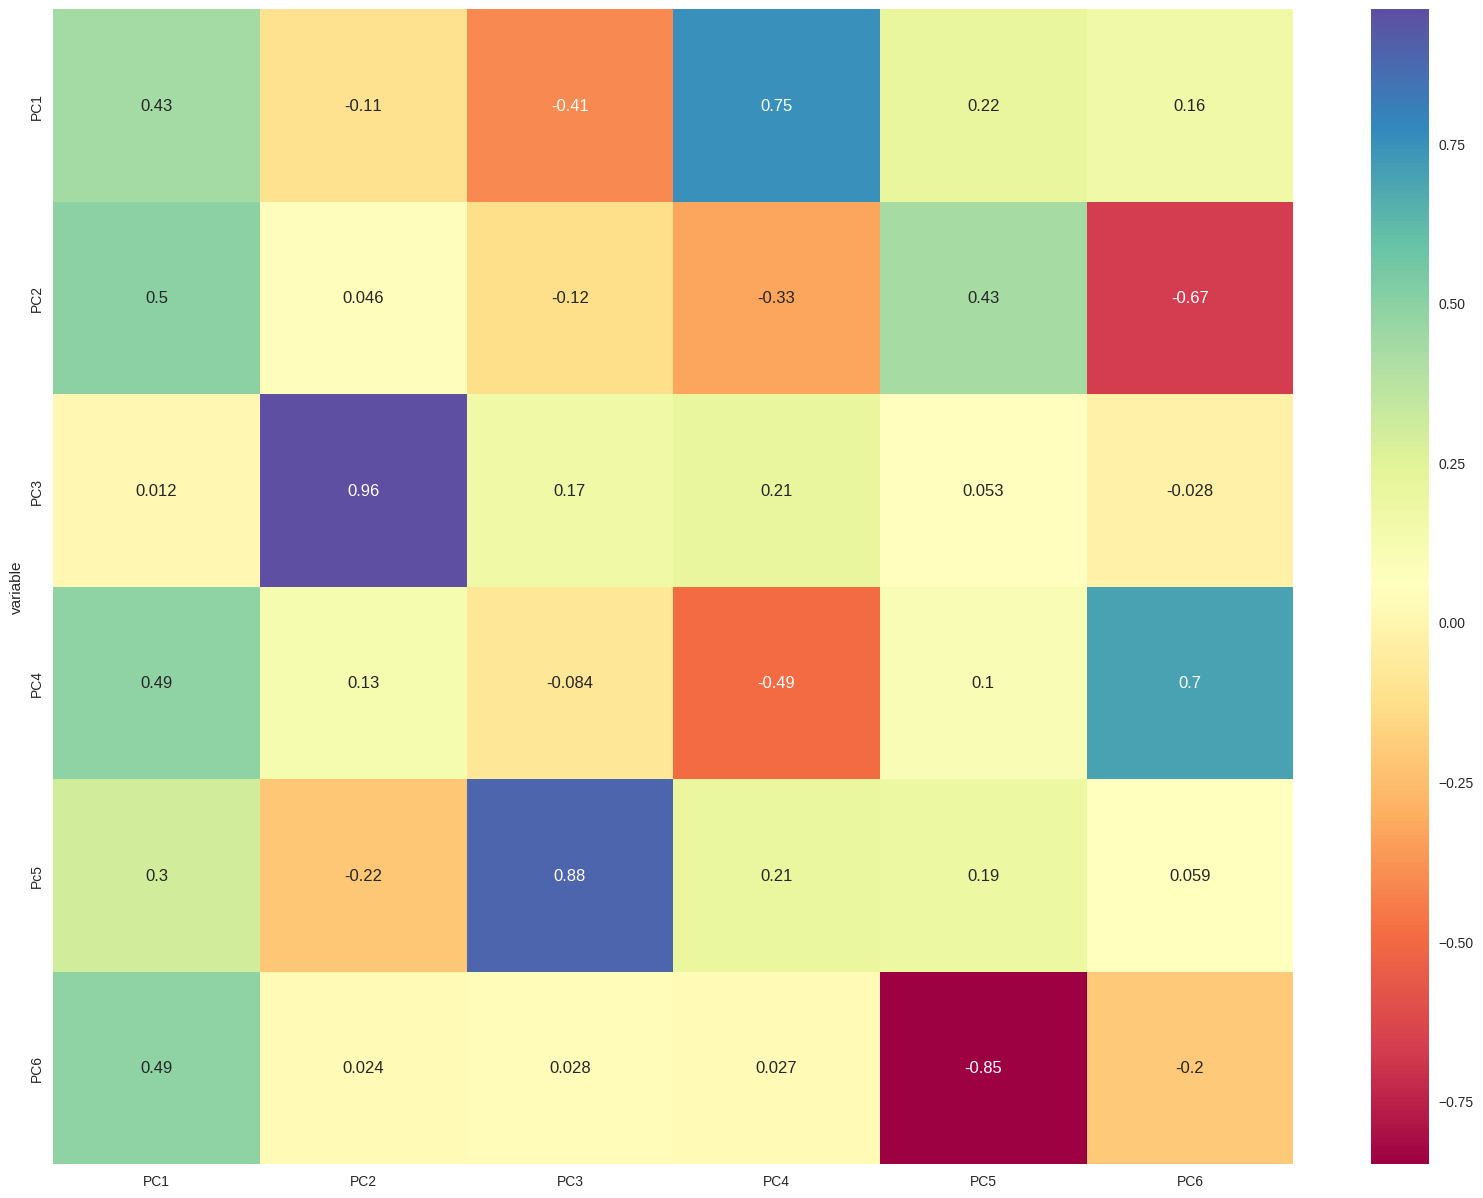

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

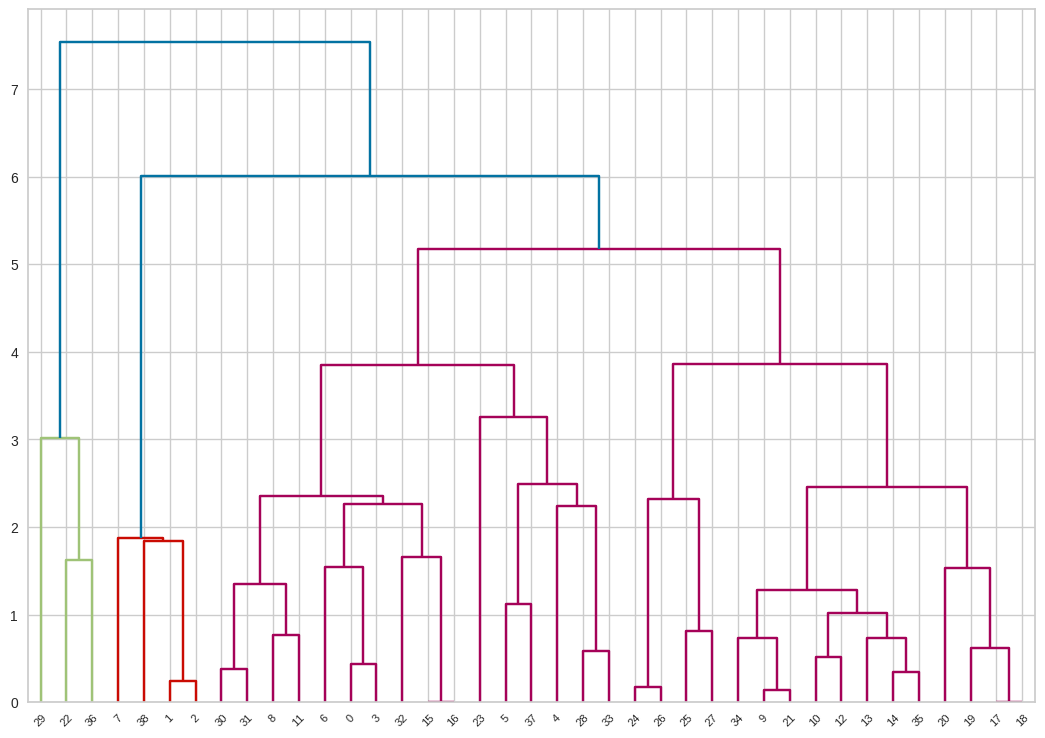

In [ ]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

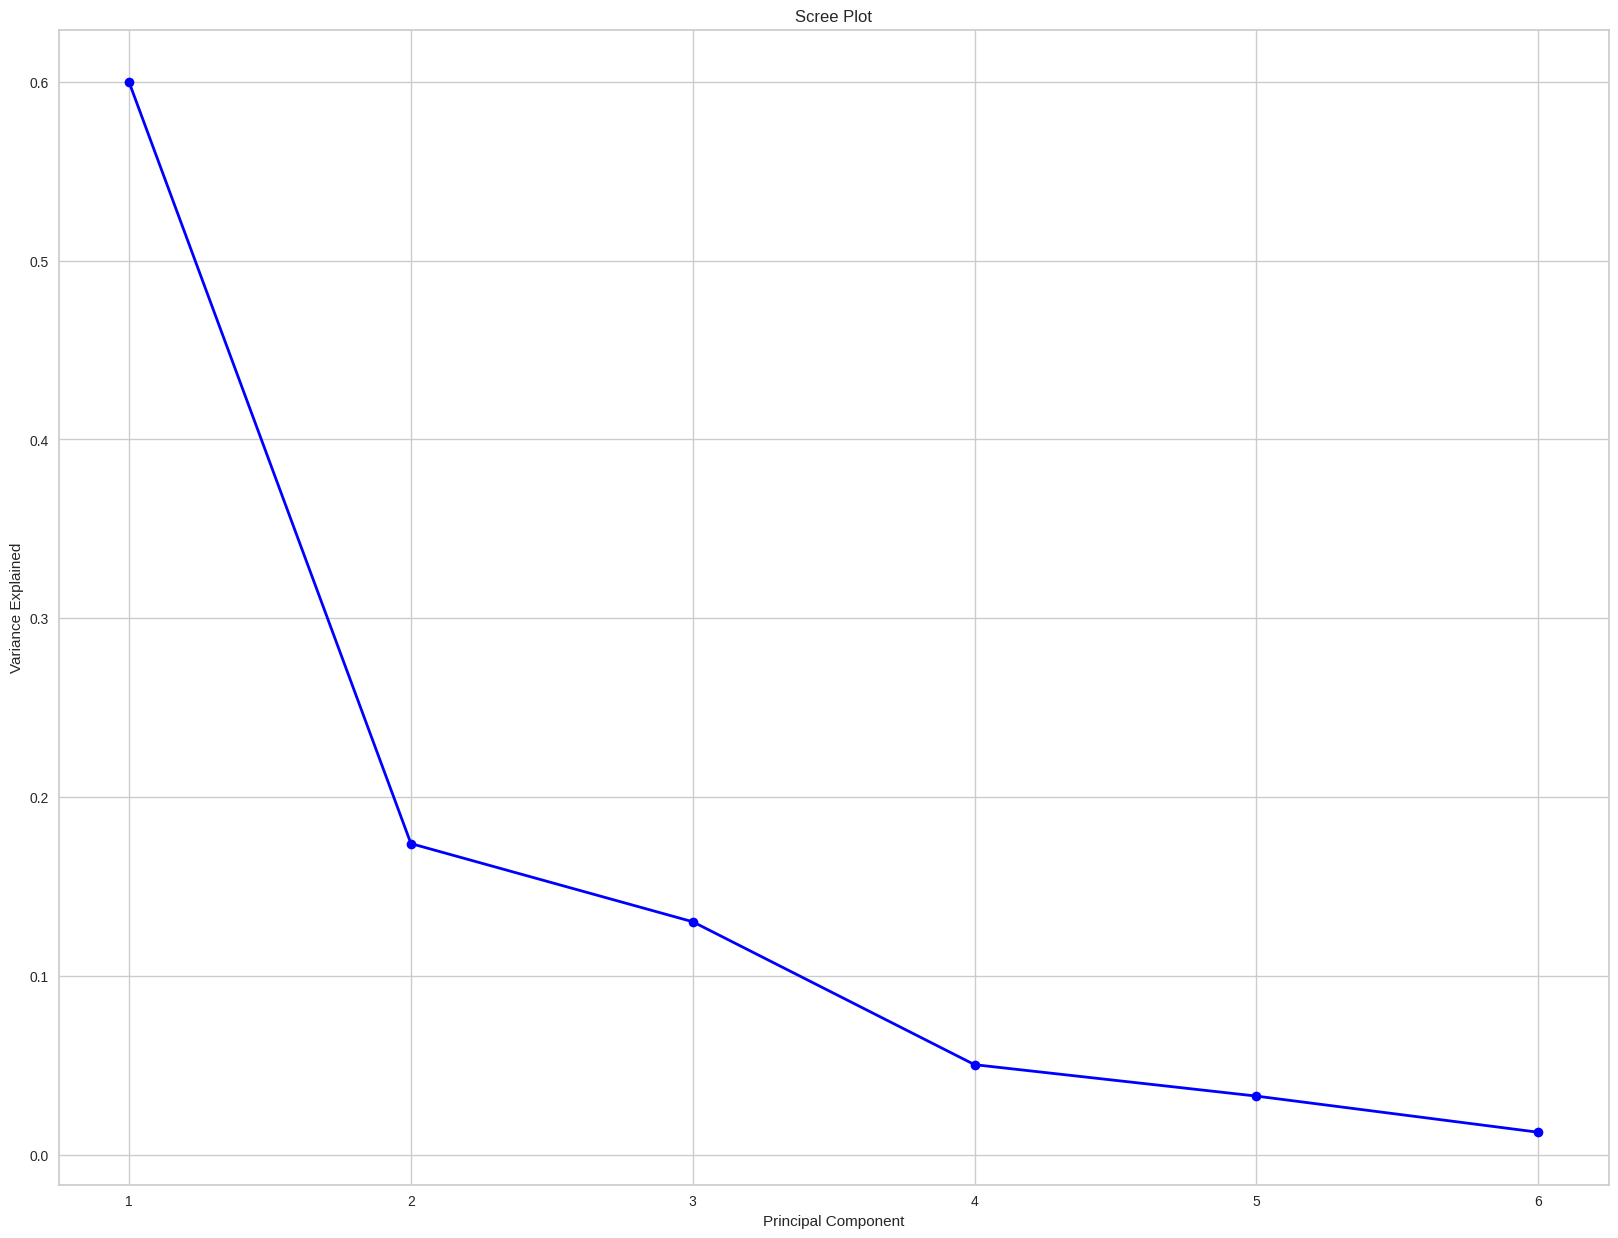

In [ ]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

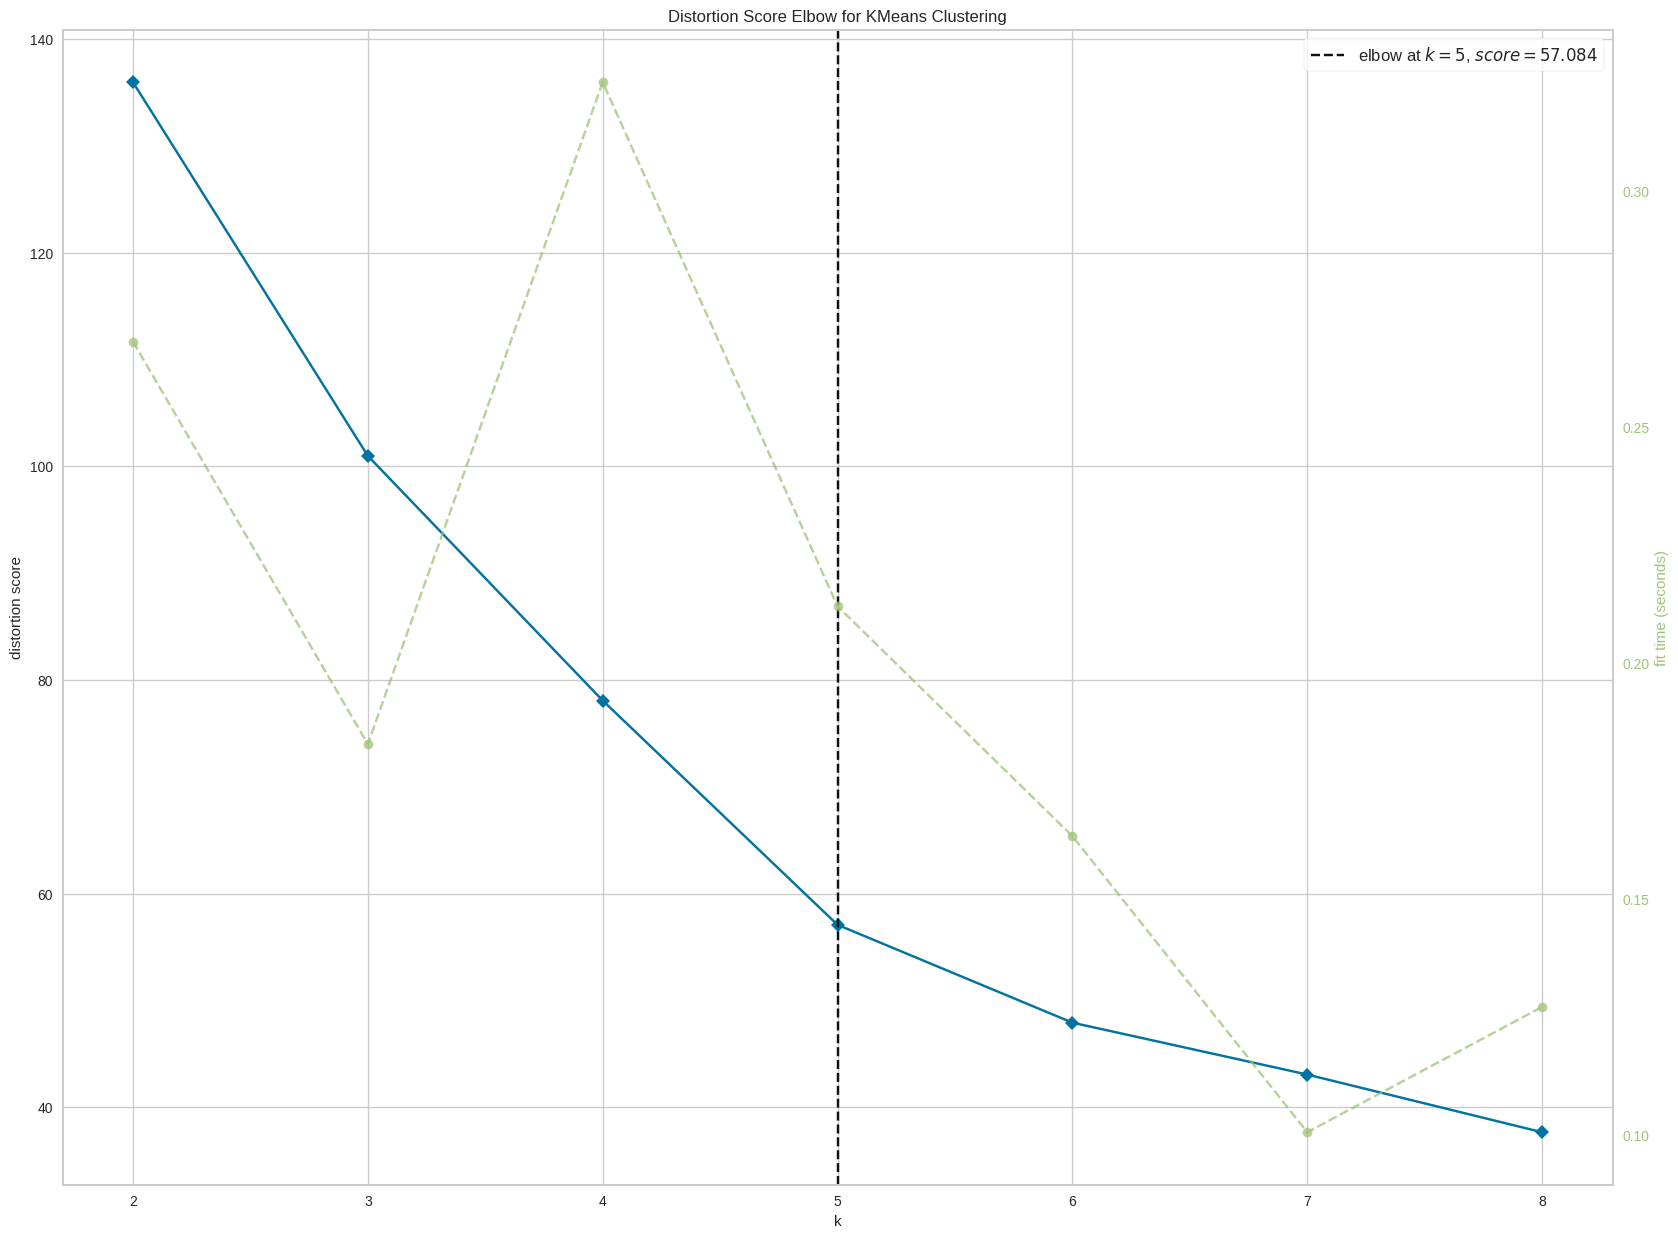

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

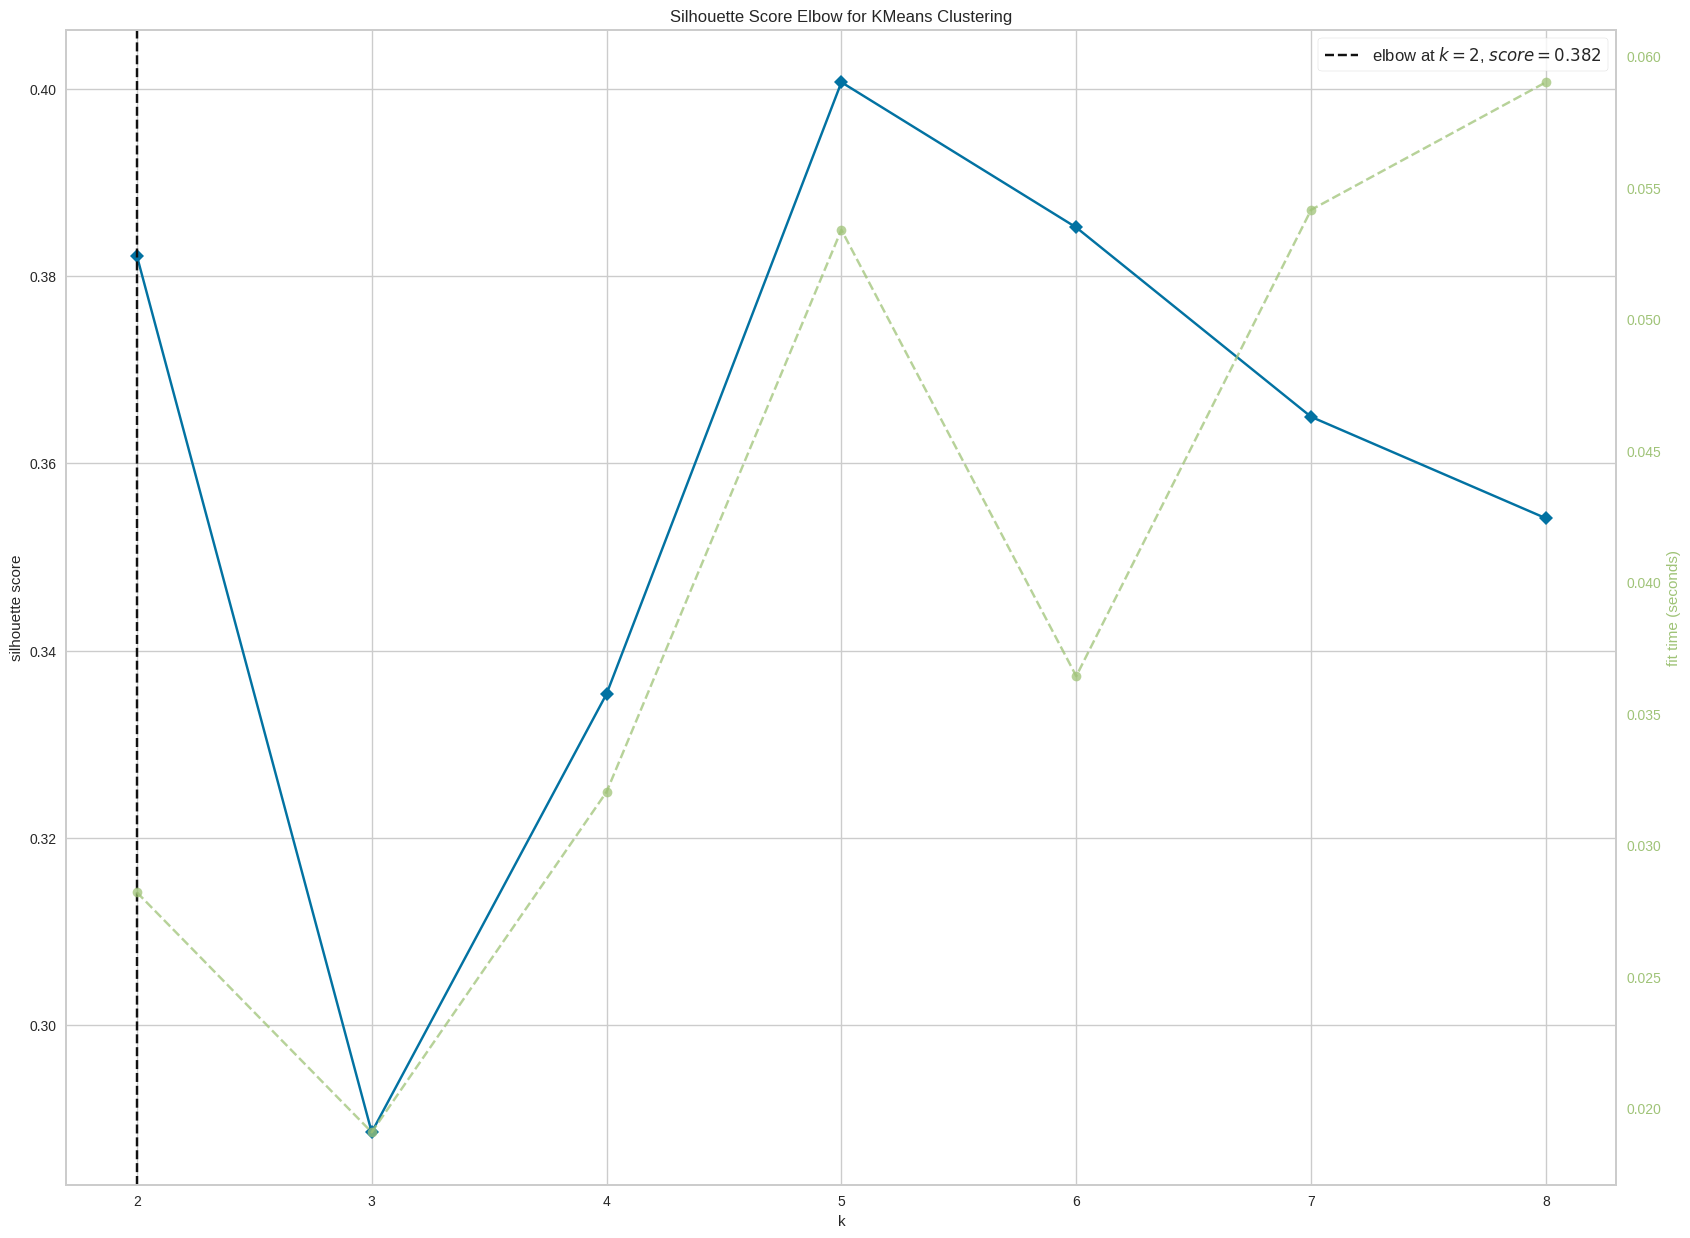

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

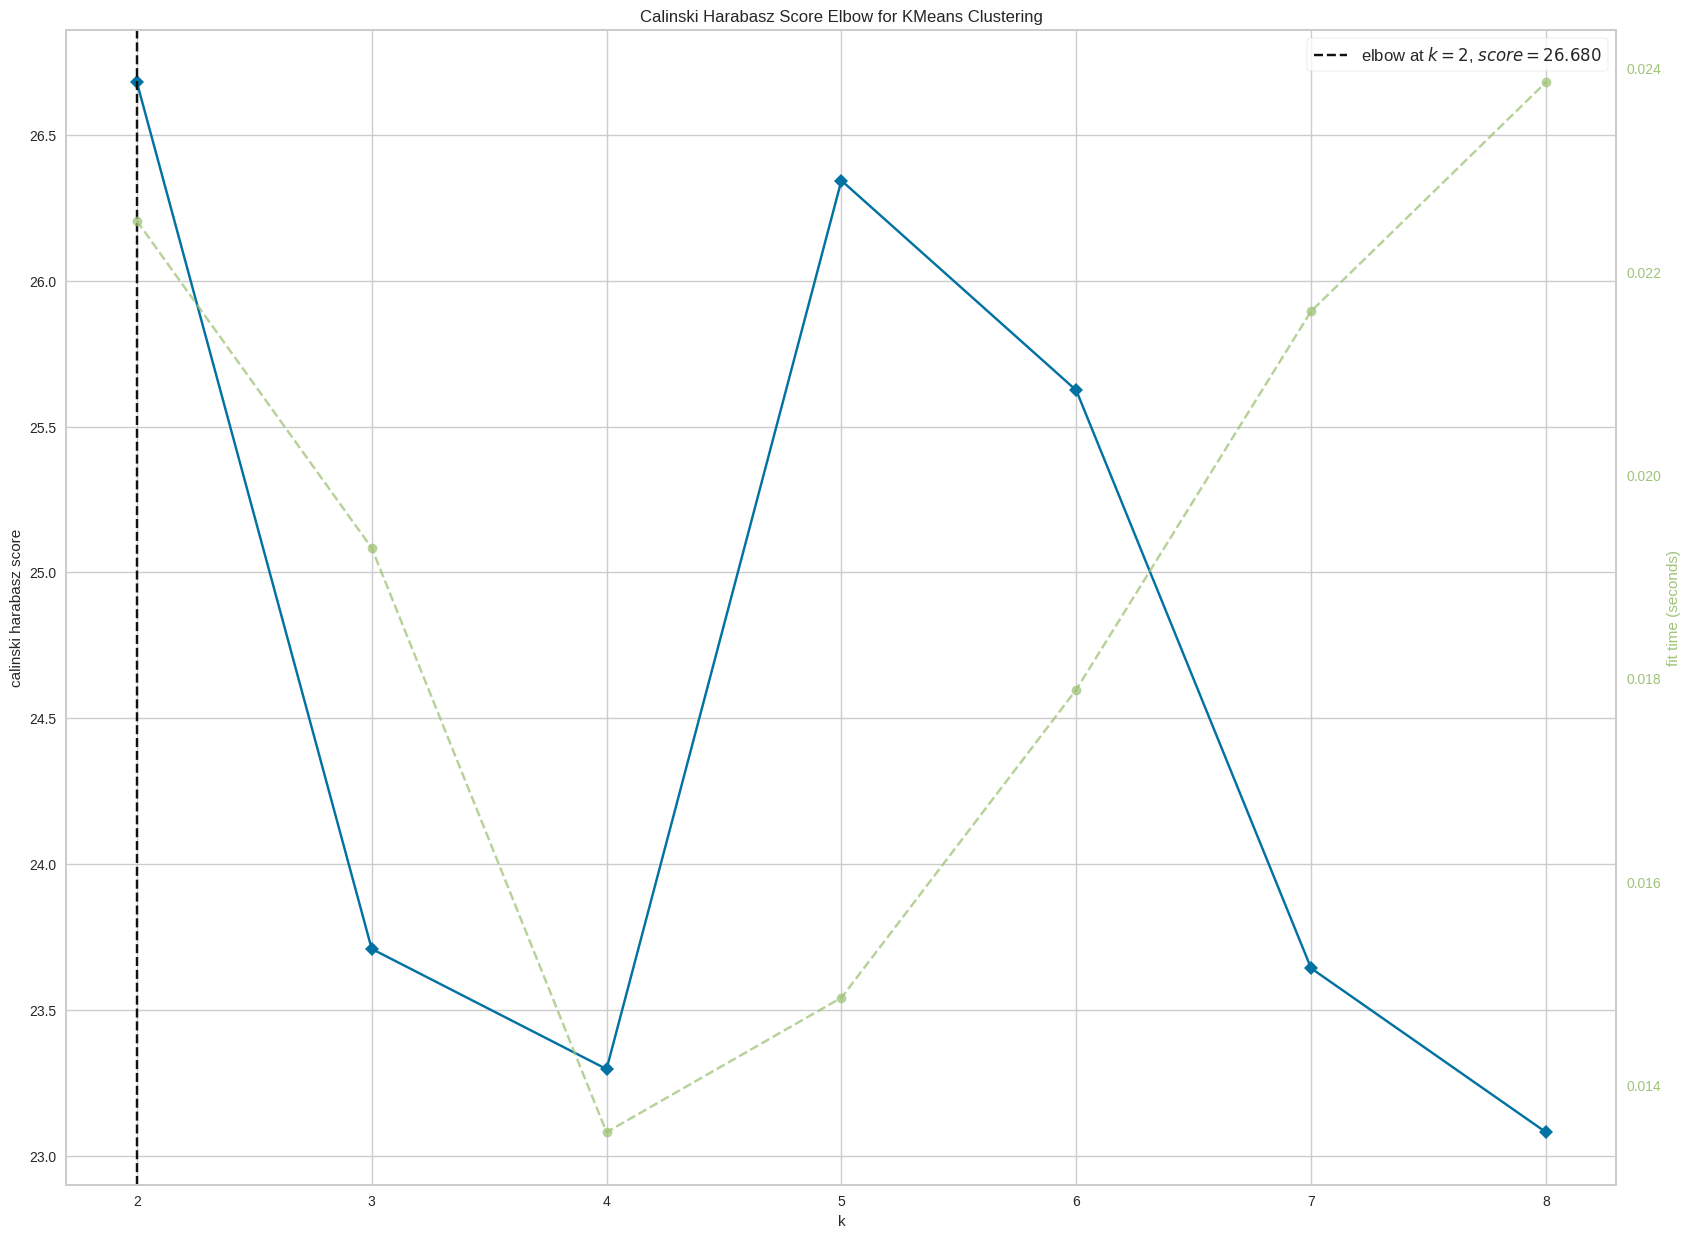

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

In [ ]:

#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[3 2 2 3 1 1 3 2 3 0 0 3 0 0 0 3 3 3 3 3 0 0 1 1 0 3 0 0 1 1 3 3 3 1 0 0 1
 1 2]
78.79988070311086
2
[[-1.70135 -0.56618  0.13662 -0.02579 -0.07579  0.12206]
 [ 2.85307  0.2478   0.23025 -0.05997 -0.11859  0.02277]
 [-2.00709  2.17884  0.61431 -0.02592  0.27197 -0.07789]
 [ 0.19764 -0.29653 -0.44064  0.06806  0.06349 -0.09701]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:

#To see each cluster size

Counter(kmeans.labels_)


Counter({3: 14, 2: 4, 1: 9, 0: 12})

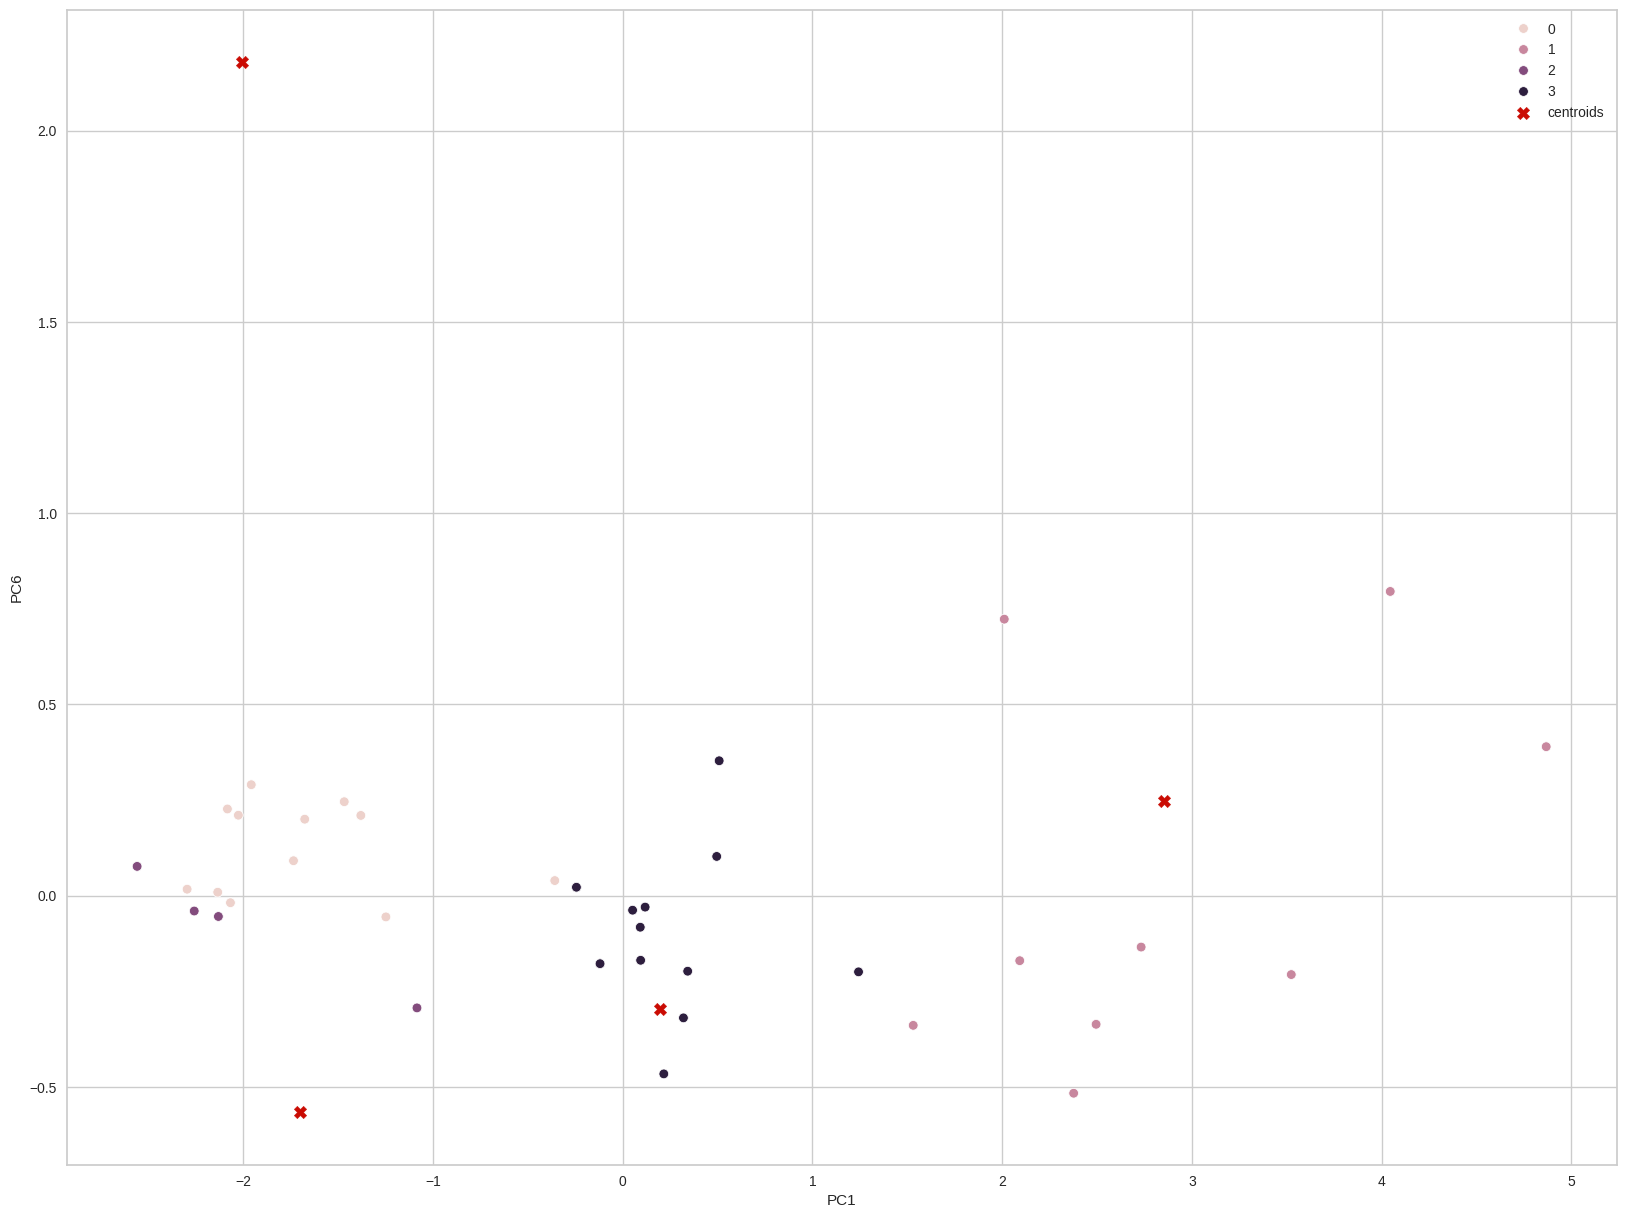

In [ ]:
#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC6", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6']]
y=df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)


print(lm.intercept_)


94763.89743589745


In [ ]:

lm.coef_

array([ 14835.80424,    735.33714,    859.6533 ,    808.65528,
       -25866.34268,  -6076.03699])

In [ ]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6'], dtype='object')

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,14835.8042
PC2,735.3371
PC3,859.6533
PC4,808.6553
Pc5,-25866.3427
PC6,-6076.0370


In [ ]:

predictions=lm.predict(X_test)
predictions

array([ 73124., 100500.,  57893.,  67006.,  51094., 139828.,  90282.,
        66053.,  86490.,  61534.,  62999., 134975.,  55799.,  96544.,
       109242., 106740.])

In [ ]:
y_test

27     73124
20    100500
35     57893
24     67006
38     51094
29    139828
25     90282
1      66053
16     86490
26     61534
7      62999
33    134975
10     55799
3      96544
32    109242
18    106740
Name: Price, dtype: int64

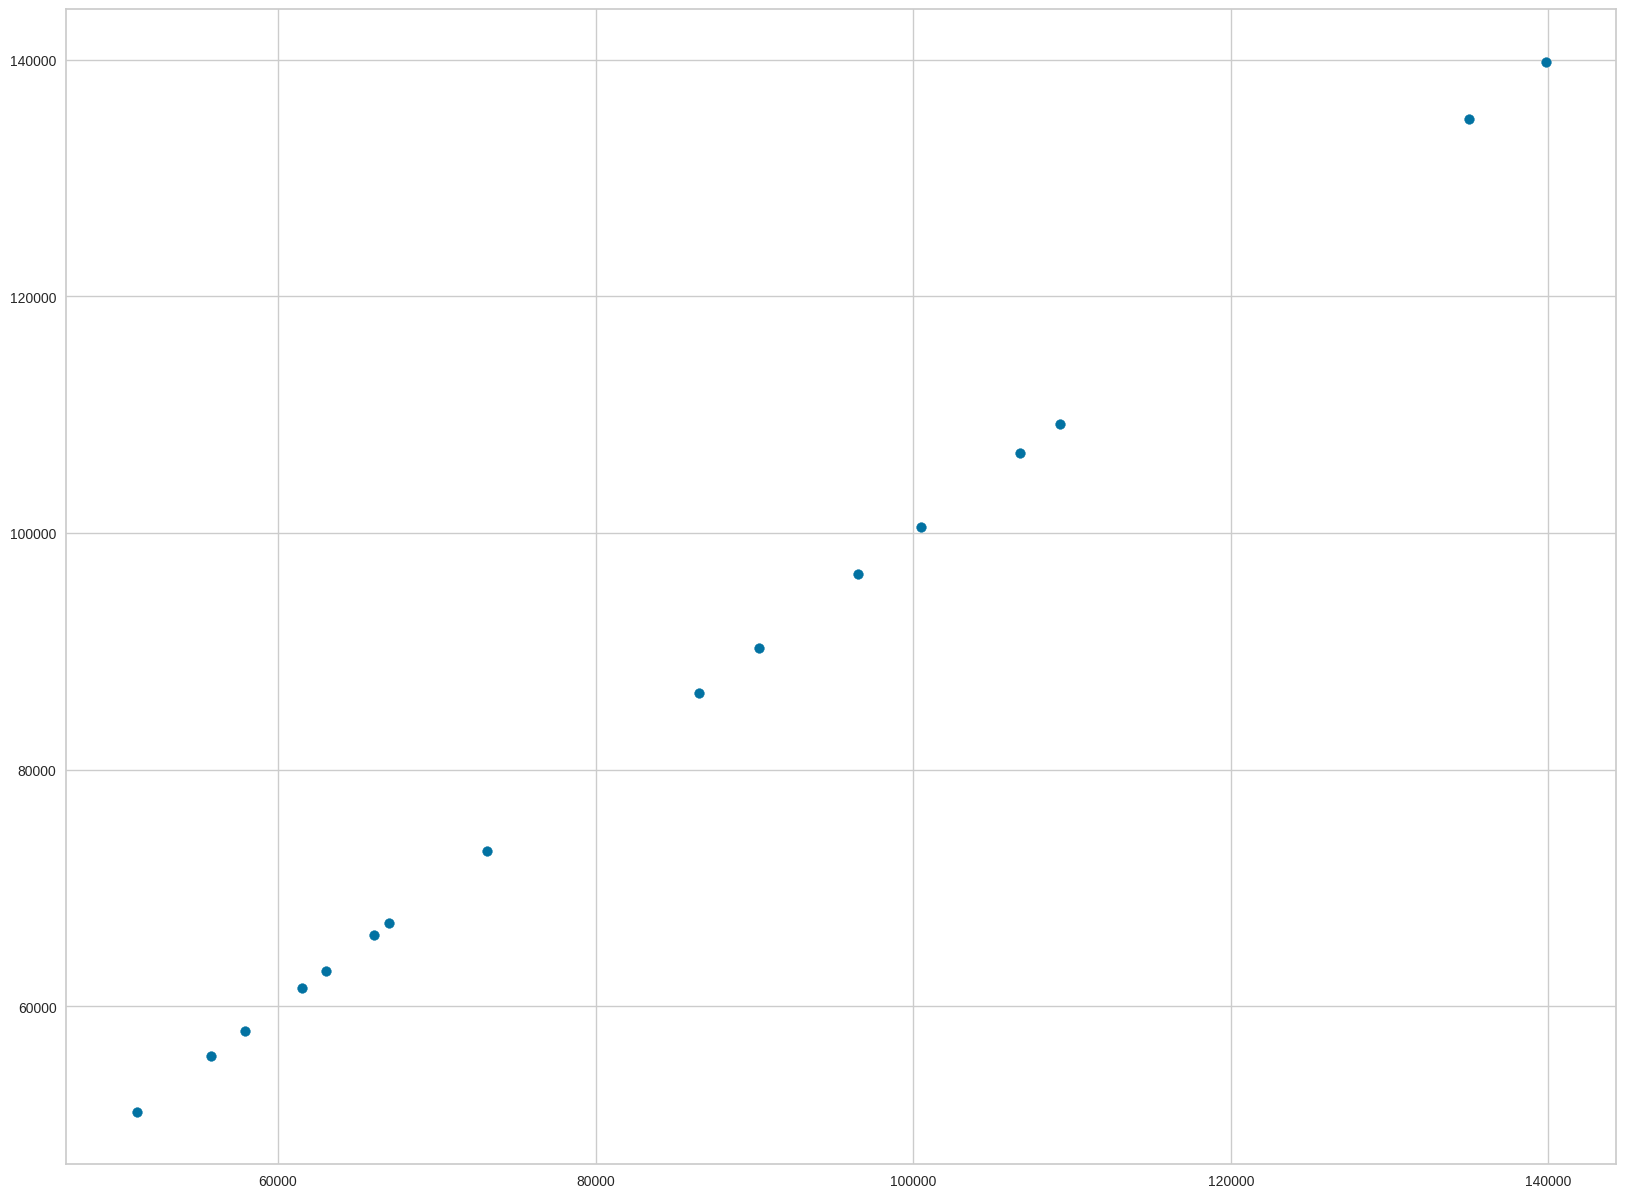

In [ ]:
plt.scatter(y_test, predictions)

<ipython-input-78-ec1b9bc3fd2e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

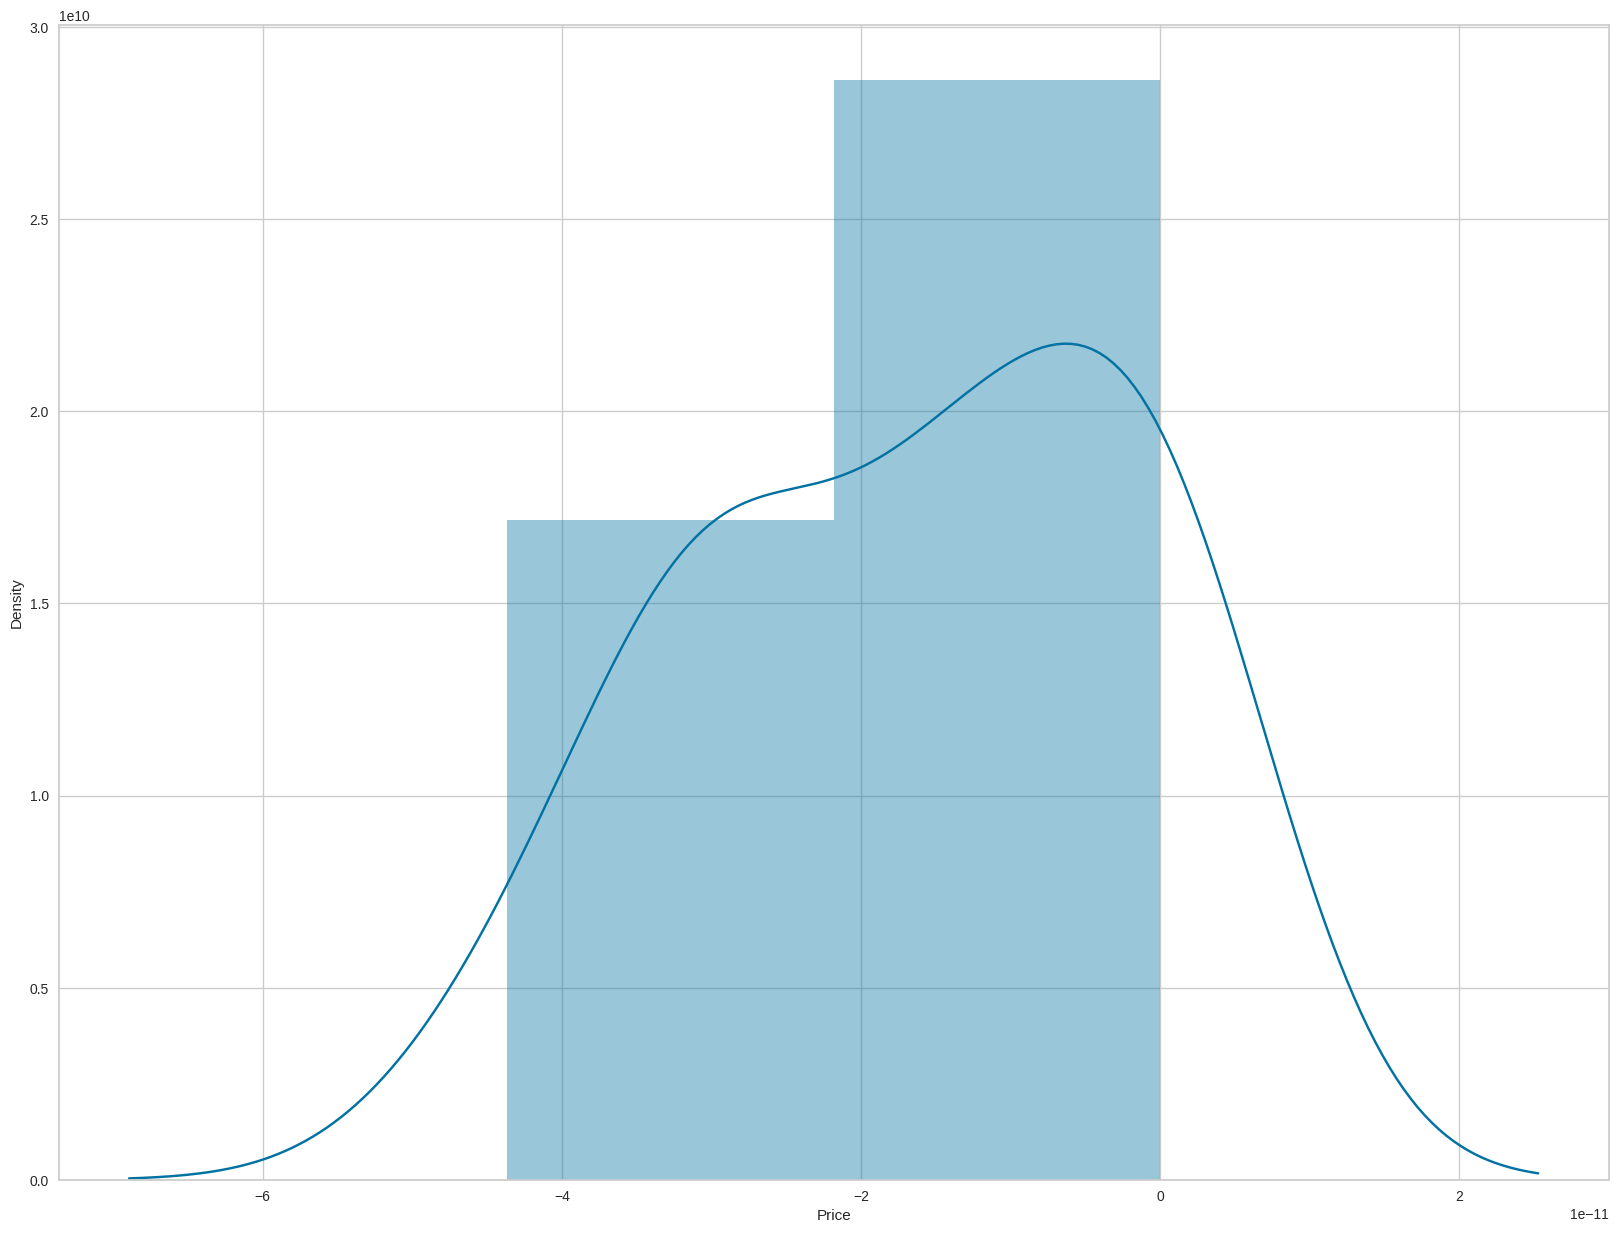

In [ ]:

#Residual histogram plot
sb.distplot((y_test-predictions))

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))






MAE: 1.6370904631912708e-11
MSE: 4.698385879301197e-22
RMSE: 2.1675760377207524e-11


In [ ]:
metrics.mean_absolute_error(y_test,predictions)

1.6370904631912708e-11

In [ ]:
metrics.mean_squared_error(y_test,predictions)

4.698385879301197e-22

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.1675760377207524e-11